<a href="https://colab.research.google.com/github/coder-2011/MLProjects/blob/main/SalesPredictionRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd



Index(['tv', 'online', 'newspaper', 'sales'], dtype='object')
torch.Size([200, 3]) torch.Size([200, 1])


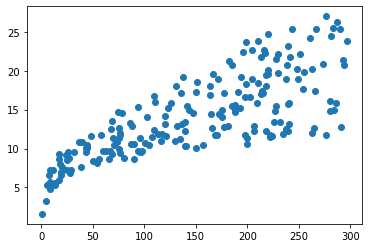

In [ ]:

data_url = "https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/datasets/Advertising.csv"
data = pd.read_csv(data_url)
print(data.columns)
plt.scatter(data["tv"], data["sales"])

x_data = torch.tensor(data[["tv", "online", "newspaper"]].values, dtype=torch.float) # TV numbers
y_data = torch.tensor(data["sales"], dtype=torch.float) # Sales
y_data = y_data.reshape(-1, 1)
print(x_data.shape, y_data.shape)

In [ ]:
class LinearRegression(torch.nn.Module):
  def __init__(self):
      super().__init__()
      # self.w = torch.randn([3, 1], requires_grad=True)
      # self.b = torch.randn(1, requires_grad=True)
      self.linear = torch.nn.Linear(3, 1)

  def forward(self, x):
      return self.linear(x)
      # return torch.matmul(x, self.w) + self.b

model = LinearRegression()

In [ ]:
print(x_data[:5])
print(model(x_data[:5]))
print(y_data[:5])

tensor([[230.1000,  37.8000,  69.2000],
        [ 44.5000,  39.3000,  45.1000],
        [ 17.2000,  45.9000,  69.3000],
        [151.5000,  41.3000,  58.5000],
        [180.8000,  10.8000,  58.4000]])
tensor([[42.3610],
        [22.4104],
        [34.1861],
        [33.3380],
        [37.4961]], grad_fn=<AddmmBackward0>)
tensor([[22.1000],
        [10.4000],
        [ 9.3000],
        [18.5000],
        [12.9000]])


In [ ]:
def lossfn(y_predictions, y_true):

  return (y_predictions-y_true).pow(2).sum()

lossfn(model(x_data[:5]), y_data[:5])

tensor(1999.2076, grad_fn=<SumBackward0>)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epoch: 0, current loss: 32214.1875
epoch: 100, current loss: 19465.234375
epoch: 200, current loss: 13516.150390625
epoch: 300, current loss: 9120.4736328125
epoch: 400, current loss: 5984.224609375
epoch: 500, current loss: 3870.966064453125
epoch: 600, current loss: 2526.16650390625
epoch: 700, current loss: 1718.3013916015625
epoch: 800, current loss: 1260.0523681640625
epoch: 900, current loss: 1013.6360473632812
epoch: 1000, current loss: 886.42578125
epoch: 1100, current loss: 821.44970703125
epoch: 1200, current loss: 786.6407470703125
epoch: 1300, current loss: 765.478515625
epoch: 1400, current loss: 750.1729736328125
epoch: 1500, current loss: 737.3616333007812
epoch: 1600, current loss: 725.7162475585938
epoch: 1700, current loss: 714.755615234375
epoch: 1800, current loss: 704.3186645507812
epoch: 1900, current loss: 694.3532104492188
epoch: 2000, current loss: 684.8402099609375
epoch: 2100, current loss: 675.769775390625
epoch: 2200, current loss: 667.1332397460938
epoch: 

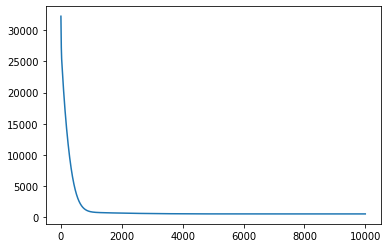

In [ ]:
loss_history = []

for i in range(10000):

  optimizer.zero_grad()

  predicted_y = model(x_data)

  current_loss = lossfn(predicted_y, y_data)

  current_loss.backward()

  optimizer.step()
  loss_history.append(current_loss.item())
  if i % 100 == 0:
    print(f'epoch: {i}, current loss: {current_loss.item()}')

plt.plot(loss_history)

In [ ]:
print(model.w, model.b)

In [ ]:
x_test = x_data[:4]
w = torch.randn(3, 1)
print(x_test, w)
print(torch.matmul(x_test, w))